In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
INPUT_PATH = '../input/'
CACHE_PATH = '../cache/'
OUTPUT_PATH ='../output/'

In [3]:
# df_lstm = pd.read_csv(OUTPUT_PATH + 'lstm.csv',header=None,names=['Id','Score'])
df_attention = pd.read_csv(OUTPUT_PATH + 'attention_0.53452.csv',header=None,names=['Id','Score'])
df_gru = pd.read_csv(OUTPUT_PATH + 'gru.csv',header=None,names=['Id','Score'])
df_lstm = pd.read_csv(OUTPUT_PATH + 'lstm_4.7.csv',header=None,names=['Id','Score'])

In [4]:
sub = (df_attention["Score"]+df_gru["Score"]+df_lstm["Score"])/3

In [5]:
# sub[sub>4.7] = 5

In [6]:
result = pd.DataFrame()

In [7]:
result["Id"] = df_attention["Id"].copy()

In [8]:
result["Score"] = pd.DataFrame(sub)

In [9]:
result.to_csv(OUTPUT_PATH + 'sub_0321.csv',header=False,index=False)

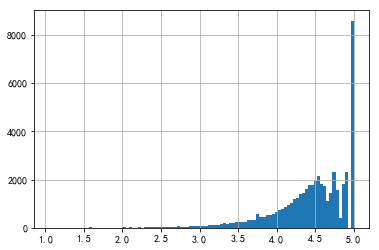

In [10]:
result['Score'].hist(bins=100)

In [8]:
df_lstm2 = df_lstm.copy()
df_lstm2.loc[df_lstm2['Score'] > 4.8,'Score'] = 5
df_lstm2.to_csv(OUTPUT_PATH + 'lstm2.csv',header=False,index=False)

In [9]:
df_attention2 = df_attention.copy()
df_attention2.loc[df_attention2['Score'] > 4.8,'Score'] = 5
df_attention2.to_csv(OUTPUT_PATH + 'attention2.csv',header=False,index=False)

In [8]:
df_gru2 = df_gru.copy()
df_gru2.loc[df_gru2['Score'] > 4.8,'Score'] = 5
df_gru2.to_csv(OUTPUT_PATH + 'gru2.csv',header=False,index=False)

In [24]:
def round_score(score):
    if 4.7 < score < 5:
        return 5
    if 3.8 < score < 4:
        return 4
    return score

In [7]:
df_blend = df_lstm.copy()
df_blend['Score'] = (0.5 * df_lstm['Score'] + 0.5 * df_attention['Score'])
df_blend.loc[df_blend['Score']>4.7,'Score'] = 5
#df_blend.loc[(df_blend['Score']>3.8) & (df_blend['Score']<4),'Score'] = 4
df_blend.to_csv(OUTPUT_PATH + 'blend.csv',header=False,index=False)

In [ ]:
df_blend['Score'] = df_blend

In [18]:
df_blend['Score'] = df_blend['Score'].map(round_score)

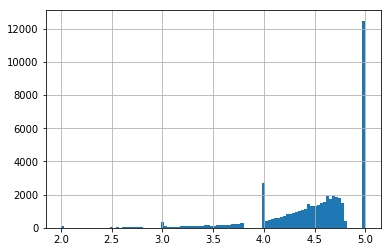

In [19]:
df_blend['Score'].hist(bins=100)

In [20]:
df_blend.to_csv(OUTPUT_PATH + 'blend.csv',header=False,index=False)